<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/41215594_Rizki_Ramdani_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import date
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import time
import warnings
warnings.filterwarnings('ignore')
#google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Persyaratan sidang/file skripsi/Data_Penduduk_Desa_Pasawahan.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              4939 non-null   int64 
 1   NAMA            4939 non-null   object
 2   SHDK            4939 non-null   object
 3   JNSKLMIN        4939 non-null   object
 4   TMPT_LHR        4939 non-null   object
 5   TGL_LHR         4939 non-null   object
 6   GDR             4939 non-null   object
 7   STATUS          4939 non-null   object
 8   AGAMA           4939 non-null   object
 9   PENDIDIKAN      4939 non-null   object
 10  PEKERJAAN       4939 non-null   object
 11  DESA            4939 non-null   object
 12  ALAMAT          4939 non-null   object
 13  NO_RT           4939 non-null   int64 
 14  NO_RW           4939 non-null   int64 
 15  KODE_POS        4939 non-null   int64 
 16  TAHUN_LAHIR     4939 non-null   int64 
 17  TAHUN_SEKARANG  4939 non-null   int64 
 18  USIA    

## 1 Selection Data

In [ ]:
Data_selection=data.drop(columns=['GDR','TGL_LHR',
                                  'KODE_POS','TAHUN_LAHIR',
                                  'TAHUN_SEKARANG','NO_RT','NO_RW'])
Data_selection

,ID,NAMA,SHDK,JNSKLMIN,TMPT_LHR,STATUS,AGAMA,PENDIDIKAN,PEKERJAAN,DESA,ALAMAT,USIA
0,0,ABDUL KHOLIK,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,SLTP/Sederajat,WIRASWASTA,PASAWAHAN,DUSUN KARANGANYAR,38
1,1,DESI AFRIYANTI,Istri,Perempuan,CIAMIS,Kawin,Islam,Tamat SD/Sederajat,MENGURUS RUMAH TANGGA,PASAWAHAN,DUSUN KARANGANYAR,31
2,2,ALVI WARDATUL JANNAH,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,12
3,3,HAISHA HANUM HANANIA,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,7
4,4,INOH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tidak/Belum Sekolah,PETANI/PEKEBUN,PASAWAHAN,PASAWAHAN,84
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,4934,WIDIYANTI,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN CIAWITALI,17
4935,4935,RATINAH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tamat SD/Sederajat,PETANI/PEKEBUN,PASAWAHAN,DUSUN CIAKAR,68
4936,4936,UCI SUTIANA,Cucu,Laki-laki,CIAMIS,Belum Kawin,Islam,Belum Tamat SD/Sederajat,PELAJAR/MAHASISWA,PASAWAHAN,DUSUN CIAKAR,23
4937,4937,RUSWATI,Kepala Keluarga,Perempuan,CIAMIS,Cerai Hidup,Islam,Tamat SD/Sederajat,BURUH TANI/PERKEBUNAN,PASAWAHAN,DUSUN CIAKAR,51


Menghapus Kolom:
*   GDR
*   TGL_LHR
*   Kode_Pos
*   TAHUN_LAHIR
*   TAHUN_SEKARANG
*   NO_RT
*   NO_RW





## 2 Preprocessing

### 2.1 Melihat Nilai Unik

In [ ]:
Atribut_Alamat=Data_selection['ALAMAT'].unique()
Atribut_Pekerjaan=Data_selection['PEKERJAAN'].unique()
Atribut_TEMPAT_LAHIR=Data_selection['TMPT_LHR'].unique()
print(f'Nilai Atribut Alamat \n {Atribut_Alamat}\n')
print(f'Nilai Atribut Pekerjaan \n {Atribut_Pekerjaan}\n')
print(f'Nilai Atribut Tempat Lahir \n {Atribut_TEMPAT_LAHIR}\n')

Nilai Atribut Alamat 
 ['DUSUN KARANGANYAR' 'PASAWAHAN' 'DUSUN MEKARSARI' 'DUSUN CIAKAR'
 'DUSUN CIAWITALI' 'DUSUN MUNGGANGWARENG' 'CIAWITALI' 'CIAKAR'
 'DUSUN CISARUA' 'DUSUN KARANG ANYAR' 'MUNGGANG WARENG'
 'DUSUNG MUNGGANGWARENG' 'DUSN MUNGGANGWARENG' 'MUNGGANGWARENG'
 'DUDUN MEKARSARI' 'MEKARSARI' 'KARANGANYAR' 'DUDUN MUNGGANGWARENG'
 'DUSUN MUNGGANG WARENG' 'DUDUN CISARUA' 'DUSUN MUNGGANWARENG'
 'MUNGGANGWERANG' 'DUSUN MUNGGANGWERANG' 'KARANG ANYAR' 'CISARUA'
 'DUSUN MUNGANGWARENG' 'DUSUNG CISARUA' 'DUAUN KARANGANYAR'
 'DSUN CIAWITALI' 'DUSUN NEKARSARI' 'DUSUN CIAWAITALI' 'DUSIN CIAWITALI'
 'DUSUN CIAWITALAI' 'DUSN CIAWITALI' 'MEKARSAR1' 'DUSUN KARANGNYAR'
 'DUSUNN KARANGANYAR']

Nilai Atribut Pekerjaan 
 ['WIRASWASTA' 'MENGURUS RUMAH TANGGA' 'BELUM/TIDAK BEKERJA'
 'PETANI/PEKEBUN' 'BURUH TANI/PERKEBUNAN' 'PELAJAR/MAHASISWA'
 'BURUH HARIAN LEPAS' 'PERANGKAT DESA' 'PEGAWAI NEGERI SIPIL'
 'USTADZ/MUBALIGH' 'PERDAGANGAN' 'KARYAWAN SWASTA' 'GURU' 'PEDAGANG'
 'TUKANG KAYU' 'SOPIR' 'KAR

Di atribut Alamat, Pekerjaan, Tempat lahir masih banyak nilai yang sama akan tetapi penulisan yang berbeda maka dari itu akan dilakukan penyamaan guna mempermudah dalam melakukan klaster

### 2.2 Merubah Kolom

In [ ]:
#merubah nama kolom
Data_selection = Data_selection.rename(columns={'NAMA': 'NAMA',
                          'SHDK': 'STATUS_HUBUNGAN_KELUARGA',
                          'JNSKLMIN': 'JENIS_KELAMIN',
                          'TMPT_LHR':'TEMPAT_LAHIR',
                          'STATUS': 'STATUS',
                          'AGAMA': 'AGAMA',
                          'PENDIDIKAN': 'PENDIDIKAN',
                          'PEKERJAAN': 'PEKERJAAN',
                          'ALAMAT': 'ALAMAT',
                          })
Data_selection

,ID,NAMA,STATUS_HUBUNGAN_KELUARGA,JENIS_KELAMIN,TEMPAT_LAHIR,STATUS,AGAMA,PENDIDIKAN,PEKERJAAN,DESA,ALAMAT,USIA
0,0,ABDUL KHOLIK,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,SLTP/Sederajat,WIRASWASTA,PASAWAHAN,DUSUN KARANGANYAR,38
1,1,DESI AFRIYANTI,Istri,Perempuan,CIAMIS,Kawin,Islam,Tamat SD/Sederajat,MENGURUS RUMAH TANGGA,PASAWAHAN,DUSUN KARANGANYAR,31
2,2,ALVI WARDATUL JANNAH,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,12
3,3,HAISHA HANUM HANANIA,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,7
4,4,INOH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tidak/Belum Sekolah,PETANI/PEKEBUN,PASAWAHAN,PASAWAHAN,84
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,4934,WIDIYANTI,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN CIAWITALI,17
4935,4935,RATINAH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tamat SD/Sederajat,PETANI/PEKEBUN,PASAWAHAN,DUSUN CIAKAR,68
4936,4936,UCI SUTIANA,Cucu,Laki-laki,CIAMIS,Belum Kawin,Islam,Belum Tamat SD/Sederajat,PELAJAR/MAHASISWA,PASAWAHAN,DUSUN CIAKAR,23
4937,4937,RUSWATI,Kepala Keluarga,Perempuan,CIAMIS,Cerai Hidup,Islam,Tamat SD/Sederajat,BURUH TANI/PERKEBUNAN,PASAWAHAN,DUSUN CIAKAR,51


Merubah nama kolom dengan tujuan agar mempermudah dan mempercepat memahami isi tiap kolom

### 2.3 Merubah Isian Kolom

In [ ]:
karanganyar = ['DUSUN KARANG ANYAR','KARANGANYAR',
                            'KARANG ANYAR','DUAUN KARANGANYAR',
                            'DUSUNN KARANGANYAR','DUSUN KARANGNYAR']
munggangwareng=['PASAWAHAN','MUNGGANG WARENG','MUNGGANG WARENG',
               'DUSUNG MUNGGANGWARENG','DUSN MUNGGANGWARENG',
               'MUNGGANGWARENG','DUDUN MUNGGANGWARENG',
               'DUSUN MUNGGANG WARENG','DUSUN MUNGGANWARENG',
               'MUNGGANGWERANG','DUSUN MUNGGANGWERANG','DUSUN MUNGANGWARENG']
ciawitali=['DUSUN CIAWITALI','CIAWITALI','DSUN CIAWITALI','DUSUN CIAWAITALI',
                 'DUSIN CIAWITALI','DUSUN CIAWITALAI','DUSN CIAWITALI']
mekarsari=['DUSUN MEKARSARI','DUDUN MEKARSARI','MEKARSARI',
                    'MEKARSAR1','DUSUN NEKARSARI']
ciakar=['DUSUN CIAKAR','CIAKAR']
cisarua=['DUSUN CISARUA','DUDUN CISARUA','CISARUA','DUSUNG CISARUA']
karanganyar_dict=dict.fromkeys(karanganyar, 'DUSUN KARANGANYAR')
munggangwareng_dict=dict.fromkeys(munggangwareng, 'DUSUN MUNGGANGWARENG')
ciawitali_dict=dict.fromkeys(ciawitali, 'DUSUN CIAWITALI')
mekarsari_dict=dict.fromkeys(mekarsari, 'DUSUN MEKARSARI')
ciakar_dict=dict.fromkeys(ciakar, 'DUSUN CIAKAR')
cisarua_dict=dict.fromkeys(cisarua, 'DUSUN CISARUA')
Data_selection['ALAMAT'] = Data_selection['ALAMAT'].replace(karanganyar_dict)
Data_selection['ALAMAT'] = Data_selection['ALAMAT'].replace(munggangwareng_dict)
Data_selection['ALAMAT'] = Data_selection['ALAMAT'].replace(ciawitali_dict)
Data_selection['ALAMAT'] = Data_selection['ALAMAT'].replace(mekarsari_dict)
Data_selection['ALAMAT'] = Data_selection['ALAMAT'].replace(ciakar_dict)
Data_selection['ALAMAT'] = Data_selection['ALAMAT'].replace(cisarua_dict)
Data_selection['ALAMAT'].unique()

array(['DUSUN KARANGANYAR', 'DUSUN MUNGGANGWARENG', 'DUSUN MEKARSARI',
       'DUSUN CIAKAR', 'DUSUN CIAWITALI', 'DUSUN CISARUA'], dtype=object)

Merubah nilai yang sebelumnya belum sesuai dengan replace()

In [ ]:
ciamis=['CIAMIS','BANJARSARI','CIANIS','CIAMS','BANJARSARI CIAMIS',
        'CIAMIAS','CIMIS', 'CIAJMIS','CAMIS']
tasikmalaya=['TASIK MALAYA',' TASIKMALAYA']
jabodetabek=['JAKARTA','BOGOR','TANGERANG','BEKASI']
jateng=['BEREBES','BREBES','TEMANGGUNG','BANJARNEGARA','KENDAL','PURWOKERTO',
        'TEGAL','MEGELANG','BLORA','KEBUMEN']
banten=['SERANG','PANDEGLANG','LEBAK']
lainnya=['NABIRE','TARAKAN','TULUNG AGUNG','LAMPUNG UTARA','UJUNG BARU IV',
         'KAMPAR','BALIPAPAN','SAMBAR','SINGAPURA','BASUNGAN','SAMBAS','SETIA MULIA','SUMEDANG']
#membuat key
ciamis_dict=dict.fromkeys(ciamis, 'CIAMIS')
tasik_dict=dict.fromkeys(tasikmalaya, 'TASIKMALAYA')
jabodetabek_dict=dict.fromkeys(jabodetabek, 'JABODETABEK')
jateng_dict=dict.fromkeys(jateng, 'JATENG')
banten_dict=dict.fromkeys(banten, 'BANTEN')
lainnya_dict=dict.fromkeys(lainnya,'LAINNYA')
#merubah isian
Data_selection['TEMPAT_LAHIR'] = Data_selection['TEMPAT_LAHIR'].replace(ciamis_dict)
Data_selection['TEMPAT_LAHIR'] = Data_selection['TEMPAT_LAHIR'].replace(tasik_dict)
Data_selection['TEMPAT_LAHIR'] = Data_selection['TEMPAT_LAHIR'].replace(jabodetabek_dict)
Data_selection['TEMPAT_LAHIR'] = Data_selection['TEMPAT_LAHIR'].replace(jateng_dict)
Data_selection['TEMPAT_LAHIR'] = Data_selection['TEMPAT_LAHIR'].replace(banten_dict)
Data_selection['TEMPAT_LAHIR'] = Data_selection['TEMPAT_LAHIR'].replace(lainnya_dict)
Data_selection['TEMPAT_LAHIR'].unique()

array(['CIAMIS', 'JATENG', 'PANGANDARAN', 'LAINNYA', 'CILACAP', 'BANJAR',
       'SUBANG', 'SUKABUMI', 'BANDUNG', 'TASIKMALAYA', 'GARUT', 'CIANJUR',
       'JABODETABEK', 'KUNINGAN', 'BANTEN', 'KARAWANG', 'PURWAKARTA'],
      dtype=object)

Merubah nilai yang sebelumnya belum sesuai dengan replace()

In [ ]:
petani=['PETANI/PEKEBUN','BURUH TANI/PERKEBUNAN','PETERNAK']
wiraswasta=['PEDAGANG','PERDAGANGAN']
sopir=['TRANSPORTASI']
pengurus_mesjid=['USTADZ/MUBALIGH','IMAM MESJID']
buruh=['TUKANG LISTRIK','TUKANG KAYU',
             'TUKANG LAS/PANDAI BESI','TUKANG BATU',
            'TUKANG GIGI','TUKANG KAYU BANGUN']
lainnya=['TENTARA NASIONAL INDONESIA','INDUSTRI',
              'KARYAWAN BUMN','BIDAN','NELAYAN/PERIKANAN'
              ,'KONSTRUKSI','KEPALA DESA','PARAJI']
petani_dict=dict.fromkeys(petani, 'PETANI')
wiraswasta_dict=dict.fromkeys(wiraswasta, 'WIRASWASTA')
sopir_dict=dict.fromkeys(sopir, 'SOPIR')
pengurus_mesjid_dict=dict.fromkeys(pengurus_mesjid, 'PENGURUS MESJID')
buruh_dict=dict.fromkeys(buruh, 'BURUH')
Data_selection['PEKERJAAN']=Data_selection['PEKERJAAN'].replace(petani_dict)
Data_selection['PEKERJAAN']=Data_selection['PEKERJAAN'].replace(wiraswasta_dict)
Data_selection['PEKERJAAN']=Data_selection['PEKERJAAN'].replace(sopir_dict)
Data_selection['PEKERJAAN']=Data_selection['PEKERJAAN'].replace(pengurus_mesjid_dict)
Data_selection['PEKERJAAN']=Data_selection['PEKERJAAN'].replace(buruh_dict)
Data_selection['PEKERJAAN'].unique()

array(['WIRASWASTA', 'MENGURUS RUMAH TANGGA', 'BELUM/TIDAK BEKERJA',
       'PETANI', 'PELAJAR/MAHASISWA', 'BURUH HARIAN LEPAS',
       'PERANGKAT DESA', 'PEGAWAI NEGERI SIPIL', 'PENGURUS MESJID',
       'KARYAWAN SWASTA', 'GURU', 'BURUH', 'SOPIR', 'KARYAWAN HONORER',
       'PENSIUNAN', 'PARAJI', 'TUKANG JAHIT', 'BIDAN',
       'PEMBANTU RUMAH TANGGA', 'TENTARA NASIONAL INDONESIA',
       'NELAYAN/PERIKANAN', 'KARYAWAN BUMN', 'KEPALA DESA', 'INDUSTRI',
       'KONSTRUKSI'], dtype=object)

Merubah nilai yang sebelumnya belum sesuai dengan replace()

In [ ]:
Data_selection['STATUS_HUBUNGAN_KELUARGA'].unique()
lainnya=['Mertua','Famili Lain','Orangtua','Lainnya','Menantu', 'Pembantu','Cucu']
lainya_dict=dict.fromkeys(lainnya,'Lainnya')
Data_selection['STATUS_HUBUNGAN_KELUARGA']=Data_selection['STATUS_HUBUNGAN_KELUARGA'].replace(lainya_dict)
Data_selection['STATUS_HUBUNGAN_KELUARGA'].unique()

array(['Kepala Keluarga', 'Istri', 'Anak', 'Lainnya'], dtype=object)

Merubah nilai yang sebelumnya belum sesuai dengan replace()

In [ ]:
Data_selection

,ID,NAMA,STATUS_HUBUNGAN_KELUARGA,JENIS_KELAMIN,TEMPAT_LAHIR,STATUS,AGAMA,PENDIDIKAN,PEKERJAAN,DESA,ALAMAT,USIA
0,0,ABDUL KHOLIK,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,SLTP/Sederajat,WIRASWASTA,PASAWAHAN,DUSUN KARANGANYAR,38
1,1,DESI AFRIYANTI,Istri,Perempuan,CIAMIS,Kawin,Islam,Tamat SD/Sederajat,MENGURUS RUMAH TANGGA,PASAWAHAN,DUSUN KARANGANYAR,31
2,2,ALVI WARDATUL JANNAH,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,12
3,3,HAISHA HANUM HANANIA,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,7
4,4,INOH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tidak/Belum Sekolah,PETANI,PASAWAHAN,DUSUN MUNGGANGWARENG,84
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,4934,WIDIYANTI,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN CIAWITALI,17
4935,4935,RATINAH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tamat SD/Sederajat,PETANI,PASAWAHAN,DUSUN CIAKAR,68
4936,4936,UCI SUTIANA,Lainnya,Laki-laki,CIAMIS,Belum Kawin,Islam,Belum Tamat SD/Sederajat,PELAJAR/MAHASISWA,PASAWAHAN,DUSUN CIAKAR,23
4937,4937,RUSWATI,Kepala Keluarga,Perempuan,CIAMIS,Cerai Hidup,Islam,Tamat SD/Sederajat,PETANI,PASAWAHAN,DUSUN CIAKAR,51


### 2.4 Mengecek Nilai Null

In [ ]:
Data_selection.isnull().sum()

,0
ID,0
NAMA,0
STATUS_HUBUNGAN_KELUARGA,0
JENIS_KELAMIN,0
TEMPAT_LAHIR,0
STATUS,0
AGAMA,0
PENDIDIKAN,0
PEKERJAAN,0
DESA,0


Dalam Dataset ini tidak ada nilai yang kosong maka dengan itu bisa melanjutkan proses selanjutnya

### 2.5 Mengecek Nilai Duplikat

In [ ]:
Data_selection.duplicated().sum()

0

Dalam Dataset ini tidak ada nilai duplikat(nilai yang keluar lebih dari satu kali) maka dengan itu bisa melakukan proses selanjutnya

### 2.5 Menambah Kolom

In [ ]:
Data_selection['Kategori_Usia'] = Data_selection['USIA'].apply(
    lambda x: 'Anak-anak' if 1 <= x <= 10 else
              'Remaja' if 11 <= x <= 20 else
              'Dewasa' if 21 <= x <= 50 else
              'Lanjut Usia' if 50 <= x <= 100 else
              'Tidak Diketahui'
)

Membuat kolom baru berdasarkan kolom usia dengan

*   1-10 tahun Kategori Anak-anak
*   11-20 tahun Kategori Remaja
*   21-50 tahun Dewasa
*   51-100 tahun Lanjut Usia
*   Lebih dari itu Tidak Diketahui



In [ ]:
Data_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        4939 non-null   int64 
 1   NAMA                      4939 non-null   object
 2   STATUS_HUBUNGAN_KELUARGA  4939 non-null   object
 3   JENIS_KELAMIN             4939 non-null   object
 4   TEMPAT_LAHIR              4939 non-null   object
 5   STATUS                    4939 non-null   object
 6   AGAMA                     4939 non-null   object
 7   PENDIDIKAN                4939 non-null   object
 8   PEKERJAAN                 4939 non-null   object
 9   DESA                      4939 non-null   object
 10  ALAMAT                    4939 non-null   object
 11  USIA                      4939 non-null   int64 
 12  Kategori_Usia             4939 non-null   object
dtypes: int64(2), object(11)
memory usage: 501.7+ KB


Mengecek Kolom Sudah sesuai atau belum dengna tipe data yang seharusnya

In [ ]:
Data_selection

,ID,NAMA,STATUS_HUBUNGAN_KELUARGA,JENIS_KELAMIN,TEMPAT_LAHIR,STATUS,AGAMA,PENDIDIKAN,PEKERJAAN,DESA,ALAMAT,USIA,Kategori_Usia
0,0,ABDUL KHOLIK,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,SLTP/Sederajat,WIRASWASTA,PASAWAHAN,DUSUN KARANGANYAR,38,Dewasa
1,1,DESI AFRIYANTI,Istri,Perempuan,CIAMIS,Kawin,Islam,Tamat SD/Sederajat,MENGURUS RUMAH TANGGA,PASAWAHAN,DUSUN KARANGANYAR,31,Dewasa
2,2,ALVI WARDATUL JANNAH,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,12,Remaja
3,3,HAISHA HANUM HANANIA,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,7,Anak-anak
4,4,INOH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tidak/Belum Sekolah,PETANI,PASAWAHAN,DUSUN MUNGGANGWARENG,84,Lanjut Usia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,4934,WIDIYANTI,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN CIAWITALI,17,Remaja
4935,4935,RATINAH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tamat SD/Sederajat,PETANI,PASAWAHAN,DUSUN CIAKAR,68,Lanjut Usia
4936,4936,UCI SUTIANA,Lainnya,Laki-laki,CIAMIS,Belum Kawin,Islam,Belum Tamat SD/Sederajat,PELAJAR/MAHASISWA,PASAWAHAN,DUSUN CIAKAR,23,Dewasa
4937,4937,RUSWATI,Kepala Keluarga,Perempuan,CIAMIS,Cerai Hidup,Islam,Tamat SD/Sederajat,PETANI,PASAWAHAN,DUSUN CIAKAR,51,Lanjut Usia


In [ ]:
Data_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        4939 non-null   int64 
 1   NAMA                      4939 non-null   object
 2   STATUS_HUBUNGAN_KELUARGA  4939 non-null   object
 3   JENIS_KELAMIN             4939 non-null   object
 4   TEMPAT_LAHIR              4939 non-null   object
 5   STATUS                    4939 non-null   object
 6   AGAMA                     4939 non-null   object
 7   PENDIDIKAN                4939 non-null   object
 8   PEKERJAAN                 4939 non-null   object
 9   DESA                      4939 non-null   object
 10  ALAMAT                    4939 non-null   object
 11  USIA                      4939 non-null   int64 
 12  Kategori_Usia             4939 non-null   object
dtypes: int64(2), object(11)
memory usage: 501.7+ KB


In [ ]:
Data_selection

,ID,NAMA,STATUS_HUBUNGAN_KELUARGA,JENIS_KELAMIN,TEMPAT_LAHIR,STATUS,AGAMA,PENDIDIKAN,PEKERJAAN,DESA,ALAMAT,USIA,Kategori_Usia
0,0,ABDUL KHOLIK,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,SLTP/Sederajat,WIRASWASTA,PASAWAHAN,DUSUN KARANGANYAR,38,Dewasa
1,1,DESI AFRIYANTI,Istri,Perempuan,CIAMIS,Kawin,Islam,Tamat SD/Sederajat,MENGURUS RUMAH TANGGA,PASAWAHAN,DUSUN KARANGANYAR,31,Dewasa
2,2,ALVI WARDATUL JANNAH,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,12,Remaja
3,3,HAISHA HANUM HANANIA,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN KARANGANYAR,7,Anak-anak
4,4,INOH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tidak/Belum Sekolah,PETANI,PASAWAHAN,DUSUN MUNGGANGWARENG,84,Lanjut Usia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,4934,WIDIYANTI,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,Tidak/Belum Sekolah,BELUM/TIDAK BEKERJA,PASAWAHAN,DUSUN CIAWITALI,17,Remaja
4935,4935,RATINAH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,Tamat SD/Sederajat,PETANI,PASAWAHAN,DUSUN CIAKAR,68,Lanjut Usia
4936,4936,UCI SUTIANA,Lainnya,Laki-laki,CIAMIS,Belum Kawin,Islam,Belum Tamat SD/Sederajat,PELAJAR/MAHASISWA,PASAWAHAN,DUSUN CIAKAR,23,Dewasa
4937,4937,RUSWATI,Kepala Keluarga,Perempuan,CIAMIS,Cerai Hidup,Islam,Tamat SD/Sederajat,PETANI,PASAWAHAN,DUSUN CIAKAR,51,Lanjut Usia


## 3 Transformation Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Data_selection['le_JENIS_KELAMIN']=le.fit_transform(Data_selection['JENIS_KELAMIN'])
Data_selection['le_STATUS']=le.fit_transform(Data_selection['STATUS'])
Data_selection['le_PEKERJAAN']=le.fit_transform(Data_selection['PEKERJAAN'])
Data_selection['le_DESA']=le.fit_transform(Data_selection['DESA'])
Data_selection['le_STATUS_HUBUNGAN_KELUARGA']=le.fit_transform(Data_selection['STATUS_HUBUNGAN_KELUARGA'])
Data_selection['le_ALAMAT']=le.fit_transform(Data_selection['ALAMAT'])
Data_selection['le_Kategori_Usia']=le.fit_transform(Data_selection['Kategori_Usia'])
Data_selection=Data_selection.replace({'PENDIDIKAN': {
                                    'Tidak/Belum Sekolah':0,
                                    'Tamat SD/Sederajat':2,
                                    'Belum Tamat SD/Sederajat':1,
                                    'SLTP/Sederajat':3,
                                    'SLTA/Sederajat':4,
                                    'Diploma I/II':5,
                                    'Diploma III/S. Muda':6,
                                  'Diploma IV/Strata I':7,
                                    'Strata II':8,'Strata III':9,
                                    'Akademi/Diploma III/S. Muda':10
}})
nilai=Data_selection[['PENDIDIKAN','le_PEKERJAAN','le_STATUS','le_STATUS_HUBUNGAN_KELUARGA']]

Melakukan transformasi data menggunakan label encoder yang nantinya akan diurutkan berdasarkan alfabet kecuali pendidikan transformasi data dilakukan secara custom karena memiliki tingkatan dalam pelabelannya

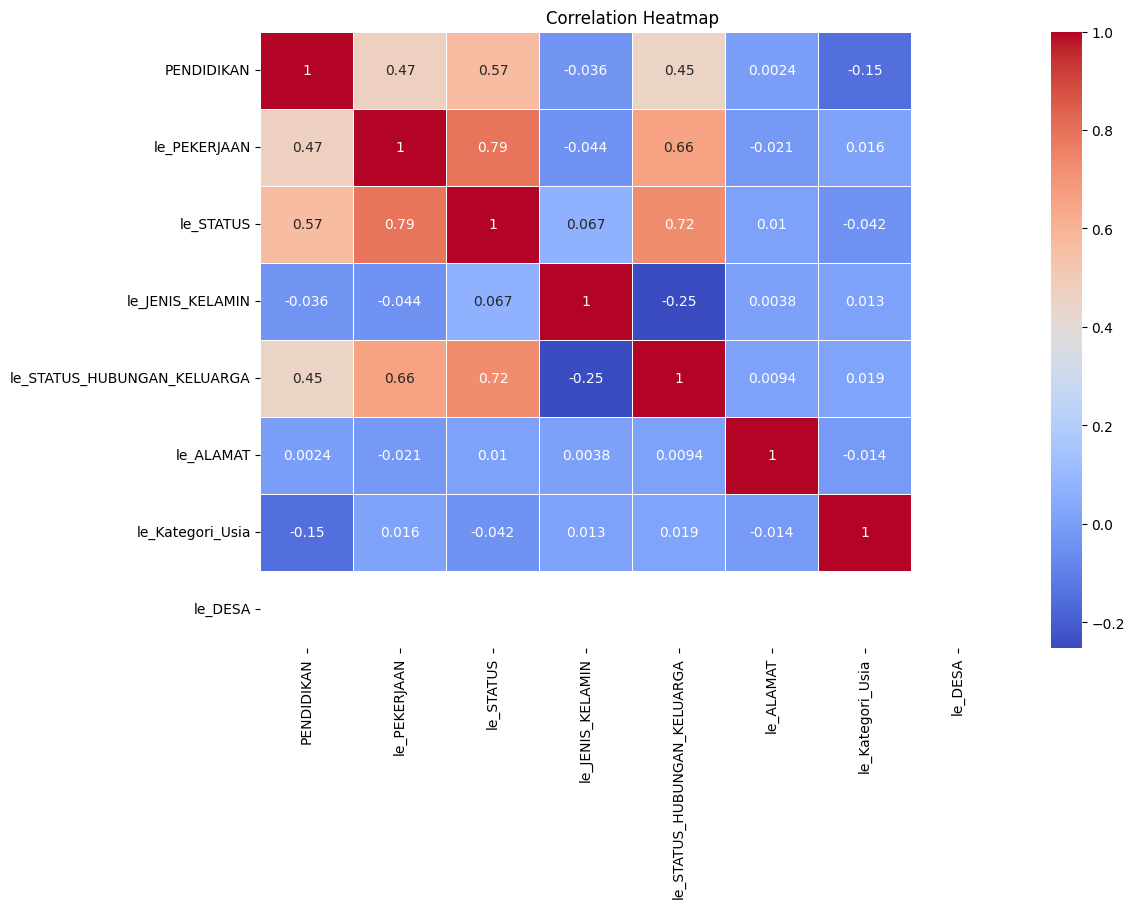

,PENDIDIKAN,le_PEKERJAAN,le_STATUS,le_JENIS_KELAMIN,le_STATUS_HUBUNGAN_KELUARGA,le_ALAMAT,le_Kategori_Usia,le_DESA
0,3,24,3,0,2,3,1,0
1,2,11,3,1,1,3,1,0
2,0,0,0,1,0,3,3,0
3,0,0,0,1,0,3,0,0
4,0,20,2,1,2,5,2,0
...,...,...,...,...,...,...,...,...
4934,0,0,0,1,0,1,3,0
4935,2,20,2,1,2,0,2,0
4936,1,15,0,0,3,0,1,0
4937,2,20,1,1,2,0,2,0


In [ ]:
nilai=Data_selection.drop(columns=['NAMA'])
nilai=Data_selection[['PENDIDIKAN','le_PEKERJAAN','le_STATUS','le_JENIS_KELAMIN','le_STATUS_HUBUNGAN_KELUARGA','le_ALAMAT','le_Kategori_Usia','le_DESA']]
#nilai=Data_selection[['PENDIDIKAN','le_PEKERJAAN','le_STATUS','le_STATUS_HUBUNGAN_KELUARGA']]
corr = nilai.corr()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
# #berdasarkan kolom pendidikan


# # Menampilkan heatmap
plt.title('Correlation Heatmap')
plt.show()

nilai

Melakukan Correlation Matrik dengan tujuan untuk melihat korelasi antar atribut dan didapat 4 kolom('PENDIDIKAN','le_PEKERJAAN','le_STATUS','le_STATUS_HUBUNGAN_KELUARGA') yang memiliki korelasi saling mendukung

### 3.1 Atribut Yang Akan Digunakan Untuk Proses Cluster

In [ ]:
nilai=Data_selection[['PENDIDIKAN','le_PEKERJAAN','le_STATUS','le_STATUS_HUBUNGAN_KELUARGA']]

data yang akan digunakan untuk melakukan pengelompokan

In [ ]:
nilai

,PENDIDIKAN,le_PEKERJAAN,le_STATUS,le_STATUS_HUBUNGAN_KELUARGA
0,3,24,3,2
1,2,11,3,1
2,0,0,0,0
3,0,0,0,0
4,0,20,2,2
...,...,...,...,...
4934,0,0,0,0
4935,2,20,2,2
4936,1,15,0,3
4937,2,20,1,2


### 3.2 Melakukan Pencocokan Terhadak Kolom Yang Belum Dilakukan Transformasi Dan Yang Sudah Dilakukan Transformasi

In [ ]:
#disusun berdasarkan kolom le_p
data_pekerjaan=Data_selection[['PEKERJAAN','le_PEKERJAAN']]
data_pekerjaan.value_counts()

,,count
PEKERJAAN,le_PEKERJAAN,
PETANI,20,1935
BELUM/TIDAK BEKERJA,0,1664
MENGURUS RUMAH TANGGA,11,727
WIRASWASTA,24,250
PELAJAR/MAHASISWA,15,118
BURUH HARIAN LEPAS,3,90
KARYAWAN SWASTA,8,47
SOPIR,21,20
GURU,4,12


Agar bisa mengetahui perubahan data Pekerjaan yang belum dilakukan transformasi dengan pekerjaan yang sudah dilakukan transformasi

In [ ]:
data_status=Data_selection[['STATUS','le_STATUS']]
data_status.value_counts()

,,count
STATUS,le_STATUS,
Kawin,3,3039
Belum Kawin,0,1706
Cerai Mati,2,144
Cerai Hidup,1,50


Agar bisa mengetahui perubahan data status yang belum dilakukan transformasi dengan status yang sudah dilakukan transformasi

In [ ]:
data_pekerjaan=Data_selection[['STATUS_HUBUNGAN_KELUARGA','le_STATUS_HUBUNGAN_KELUARGA']]
data_pekerjaan.value_counts()

,,count
STATUS_HUBUNGAN_KELUARGA,le_STATUS_HUBUNGAN_KELUARGA,
Kepala Keluarga,2,1821
Anak,0,1607
Istri,1,1408
Lainnya,3,103


Agar bisa mengetahui perubahan data status_hubungan_keluarga yang belum dilakukan transformasi dengan status_hubungan_keluarga yang sudah dilakukan transformasi

In [ ]:
data_status=Data_selection[['JENIS_KELAMIN','le_JENIS_KELAMIN']]
data_status.value_counts()

,,count
JENIS_KELAMIN,le_JENIS_KELAMIN,
Laki-laki,0,2482
Perempuan,1,2457


Agar bisa mengetahui perubahan data jenis_kelamin yang belum dilakukan transformasi dengan jenis_kelamin yang sudah dilakukan transformasi

## 4 Data Mining

### 4.1 Proses Elbow Method

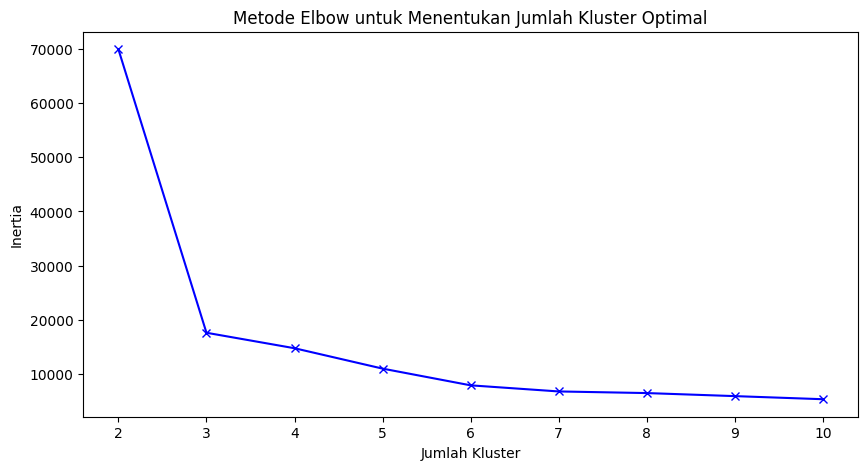

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
inertia = []
silhouette_scores = []
K = range(2, 11)  # Kluster minimal 2
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(nilai)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(nilai, labels)
    dbi = davies_bouldin_score(nilai, labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.show()

Proses Data Mining dengan melakukan elbow methode dengan tujuan untuk mengetahui nilai K terbaik dalam penelitian ini,Dan didapat nilai K terbaik ada di K=3

### 4.2 Proses Menggunakan DBI dari K=2 sampai K=10

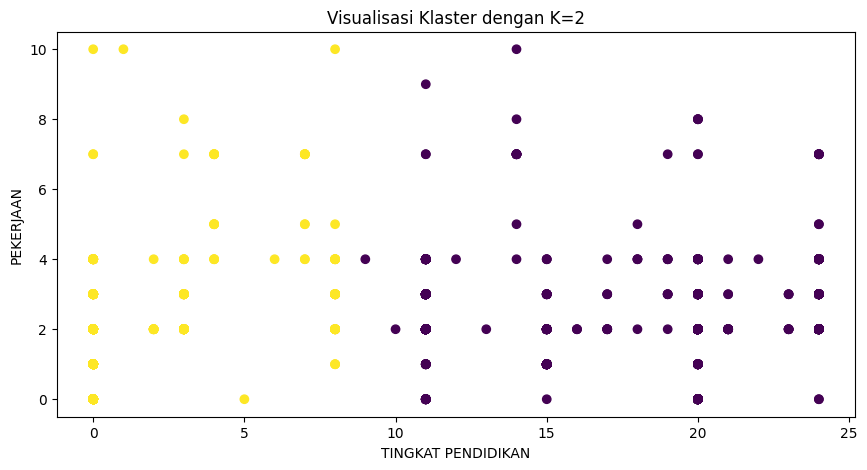

DBI untuk 2 kluster: 0.31480283258738384


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'],
            cmap='viridis')
plt.title('Visualisasi Klaster dengan K=2')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'DBI untuk 2 kluster: {dbi}')

Melakukan Proses Pengelompokan dengan K=2 didapat nilai DBI:
*   0.31480283258738384

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
0,3103
1,1836


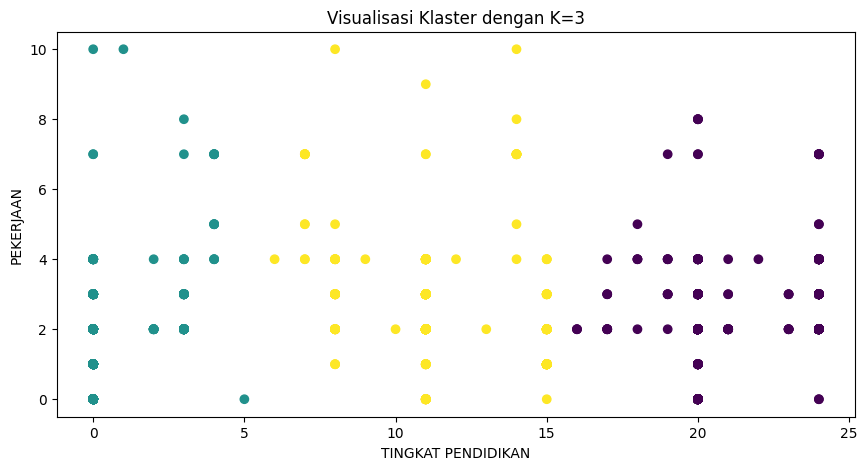

DBI untuk 3 kluster: 0.30664814460264683


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'],
            cmap='viridis')
plt.title('Visualisasi Klaster dengan K=3')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'DBI untuk 3 kluster: {dbi}')

Melakukan Proses Pengelompokan dengan K=3 didapat nilai DBI:
*   0.30664814460264683

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
0,2242
1,1778
2,919


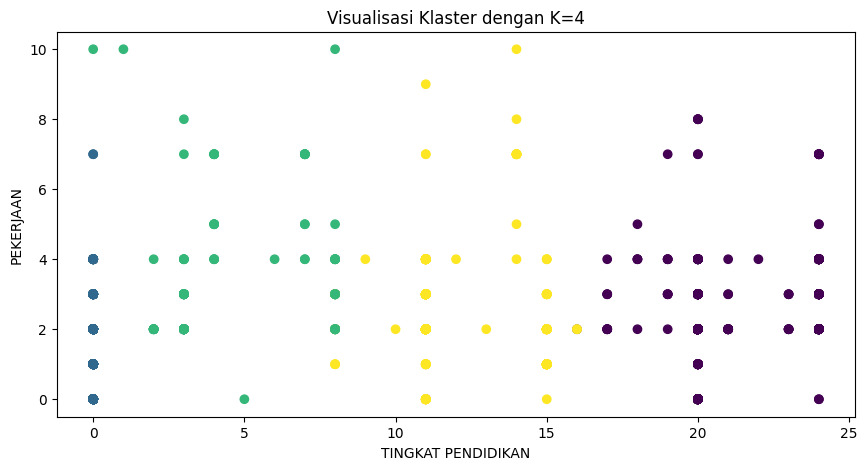

DBI untuk 4 kluster: 0.5458219353696494


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'],
            cmap='viridis')
plt.title('Visualisasi Klaster dengan K=4')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'DBI untuk 4 kluster: {dbi}')

Melakukan Proses Pengelompokan dengan K=4 didapat nilai DBI:
*   0.5458219353696494

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
0,2240
1,1664
3,869
2,166


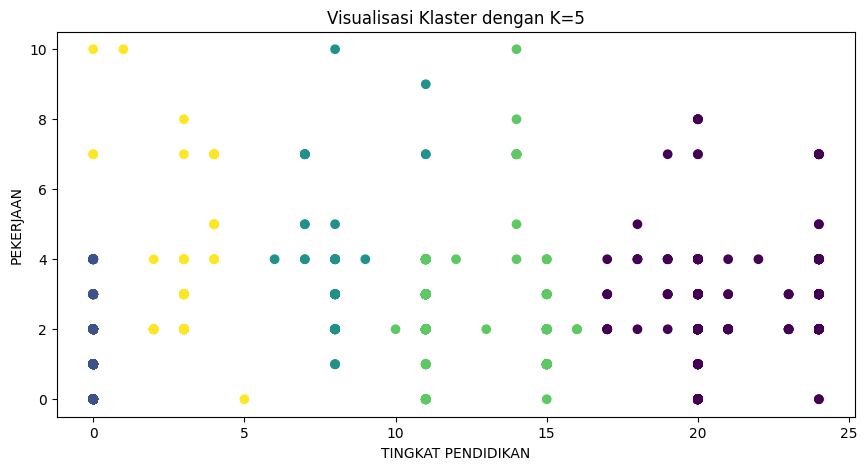

DBI untuk 5 kluster: 0.7052794752332282


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'],
            cmap='viridis')
plt.title('Visualisasi Klaster dengan K=5')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'DBI untuk 5 kluster: {dbi}')

Melakukan Proses Pengelompokan dengan K=5 didapat nilai DBI:
*   0.7052794752332282

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
0,2239
1,1561
3,860
4,217
2,62


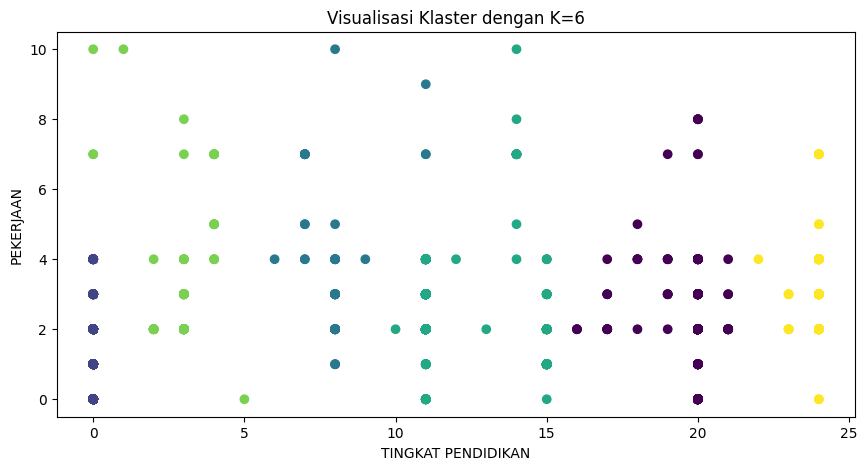

DBI untuk 6 kluster: 0.6873753234422262


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'],
            cmap='viridis')
plt.title('Visualisasi Klaster dengan K=6')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'DBI untuk 6 kluster: {dbi}')

Melakukan Proses Pengelompokan dengan K=6 didapat nilai DBI:
*   0.6873753234422262

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
0,1983
1,1561
3,857
5,259
4,217
2,62


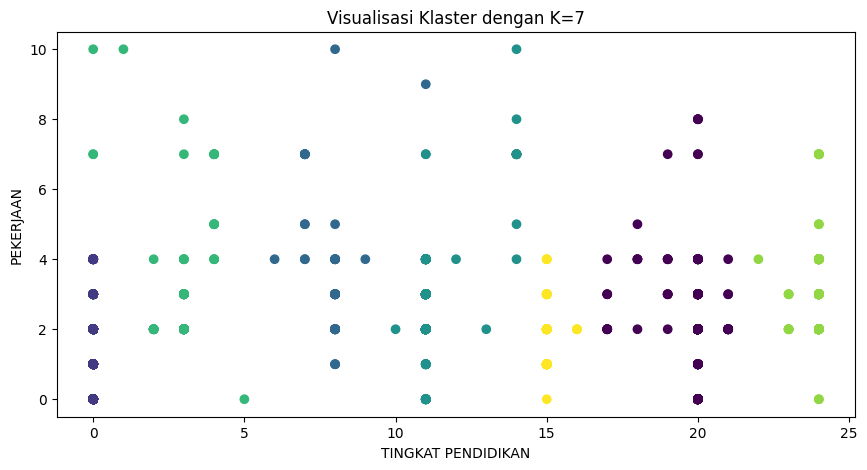

DBI untuk 7 kluster: 0.6024315756208741


In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'],
            cmap='viridis')
plt.title('Visualisasi Klaster dengan K=7')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'DBI untuk 7 kluster: {dbi}')

Melakukan Proses Pengelompokan dengan K=7 didapat nilai DBI:
*   0.6024315756208741

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
0,1980
1,1561
3,740
5,259
4,217
6,122
2,60


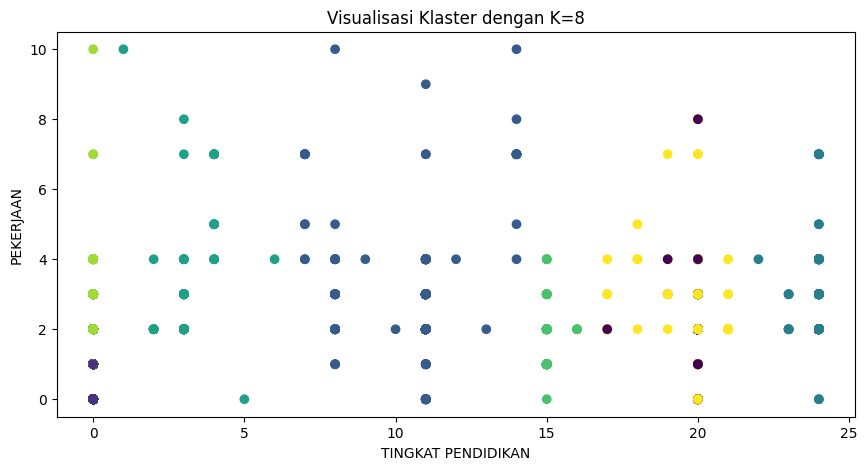

DBI untuk 8 kluster: 0.6483260062071476


In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'],
            cmap='viridis')
plt.title('Visualisasi Klaster dengan K=8')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'DBI untuk 8 kluster: {dbi}')

Melakukan Proses Pengelompokan dengan K=8 didapat nilai DBI:
*   0.6483260062071476

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
7,1297
1,1261
2,799
0,683
6,312
3,259
4,206
5,122


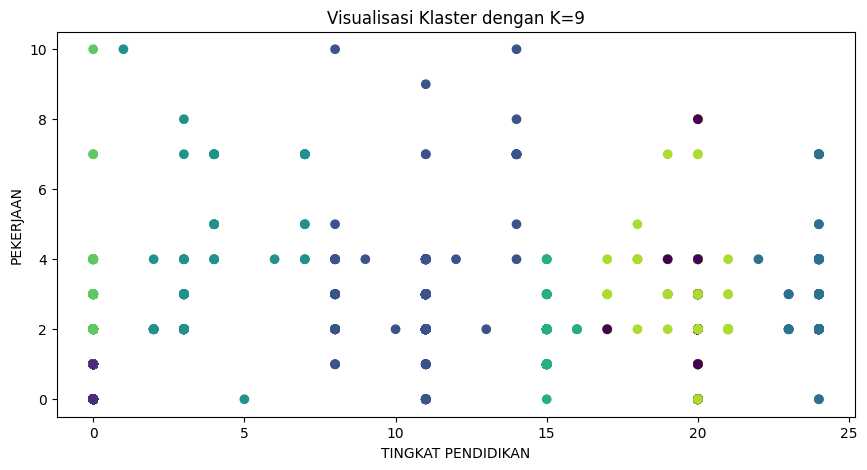

DBI untuk 9 kluster: 0.6284467036046926


In [ ]:
kmeans = KMeans(n_clusters=9, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'],
            cmap='viridis')
plt.title('Visualisasi Klaster dengan K=9')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'DBI untuk 9 kluster: {dbi}')

Melakukan Proses Pengelompokan dengan K=9 didapat nilai DBI:
*   0.6284467036046926

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
7,1297
1,1250
2,789
0,683
6,312
3,259
4,124
5,122
8,103


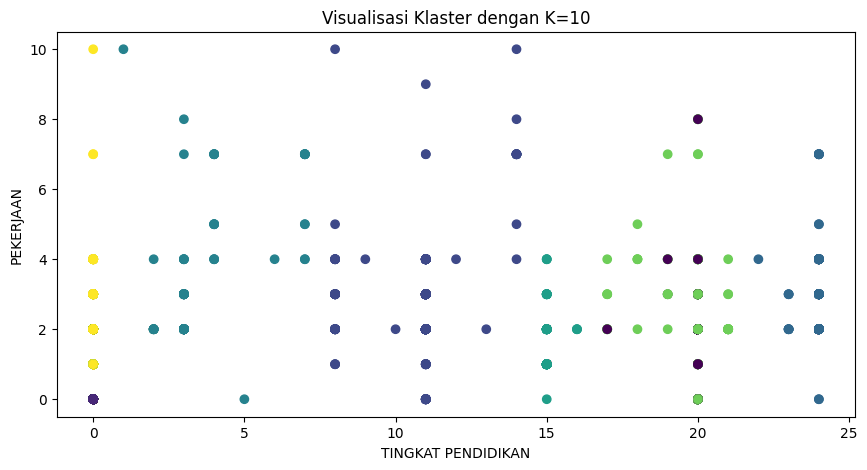

DBI untuk 10 kluster: 0.6057394905816169


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'],
            cmap='viridis')
plt.title('Visualisasi Klaster dengan K=10')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'DBI untuk 10 kluster: {dbi}')

Melakukan Proses Pengelompokan dengan K=10 didapat nilai DBI:
*   0.6057394905816169

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
7,1297
1,1016
2,789
0,683
9,457
3,259
4,124
5,122
8,100


## 5 Evaluation

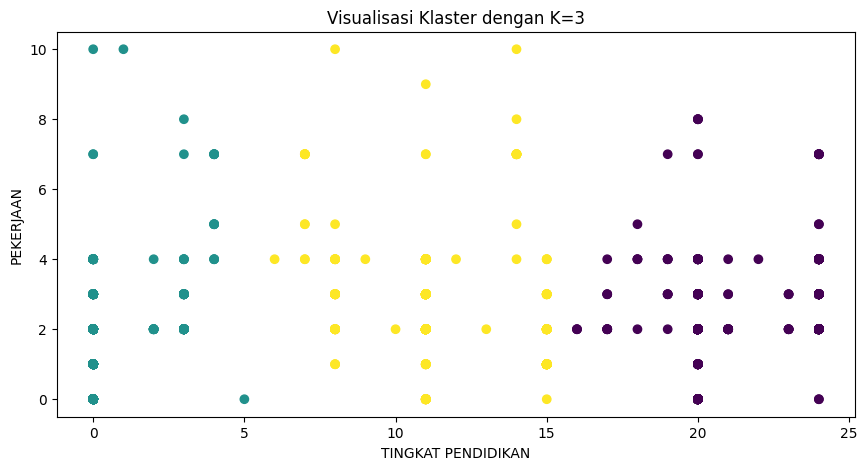


 DBI untuk 3 kluster: 0.30664814460264683


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
Data_selection['Cluster'] = kmeans.fit_predict(nilai)
silhouette_avg = silhouette_score(nilai, Data_selection['Cluster'])
dbi = davies_bouldin_score(nilai, Data_selection['Cluster'])
plt.figure(figsize=(10.3, 5))
plt.scatter(nilai.iloc[:, 1], nilai.iloc[:, 0], c=Data_selection['Cluster'], cmap='viridis')
plt.title('Visualisasi Klaster dengan K=3')
plt.xlabel('TINGKAT PENDIDIKAN')
plt.ylabel('PEKERJAAN')
plt.show()
print(f'\n DBI untuk 3 kluster: {dbi}')

### 5.1 Nilai DBI

In [ ]:
print(f'DBI untuk 3 kluster: {dbi}')

DBI untuk 3 kluster: 0.30664814460264683


### 5.2 Jumlah Tiap Cluster

In [ ]:
Data_selection['Cluster'].value_counts()

,count
Cluster,
0,2242
1,1778
2,919


Nilai Setiap Cluster:


*   2242
*   1778
*   919



In [ ]:
Data_selection[Data_selection['Cluster']==0]

,ID,NAMA,STATUS_HUBUNGAN_KELUARGA,JENIS_KELAMIN,TEMPAT_LAHIR,STATUS,AGAMA,PENDIDIKAN,PEKERJAAN,DESA,...,USIA,Kategori_Usia,le_JENIS_KELAMIN,le_STATUS,le_PEKERJAAN,le_DESA,le_STATUS_HUBUNGAN_KELUARGA,le_ALAMAT,le_Kategori_Usia,Cluster
0,0,ABDUL KHOLIK,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,3,WIRASWASTA,PASAWAHAN,...,38,Dewasa,0,3,24,0,2,3,1,0
4,4,INOH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,0,PETANI,PASAWAHAN,...,84,Lanjut Usia,1,2,20,0,2,5,2,0
5,5,SALI,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,2,PETANI,PASAWAHAN,...,51,Lanjut Usia,0,3,20,0,2,4,2,0
14,14,ANDRI,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,2,PETANI,PASAWAHAN,...,25,Dewasa,0,3,20,0,2,1,1,0
16,16,TOTONG SURYANA,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,2,PETANI,PASAWAHAN,...,33,Dewasa,0,3,20,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,4928,KOKON PURKONUDIN,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,2,PETANI,PASAWAHAN,...,40,Dewasa,0,3,20,0,2,3,1,0
4929,4929,YUYU YULIANI,Istri,Perempuan,CIAMIS,Kawin,Islam,2,PETANI,PASAWAHAN,...,40,Dewasa,1,3,20,0,1,3,1,0
4932,4932,DAHMAN,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,2,PETANI,PASAWAHAN,...,38,Dewasa,0,3,20,0,2,1,1,0
4935,4935,RATINAH,Kepala Keluarga,Perempuan,CIAMIS,Cerai Mati,Islam,2,PETANI,PASAWAHAN,...,68,Lanjut Usia,1,2,20,0,2,0,2,0


In [ ]:
Data_selection[Data_selection['Cluster']==1]

,ID,NAMA,STATUS_HUBUNGAN_KELUARGA,JENIS_KELAMIN,TEMPAT_LAHIR,STATUS,AGAMA,PENDIDIKAN,PEKERJAAN,DESA,...,USIA,Kategori_Usia,le_JENIS_KELAMIN,le_STATUS,le_PEKERJAAN,le_DESA,le_STATUS_HUBUNGAN_KELUARGA,le_ALAMAT,le_Kategori_Usia,Cluster
2,2,ALVI WARDATUL JANNAH,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,0,BELUM/TIDAK BEKERJA,PASAWAHAN,...,12,Remaja,1,0,0,0,0,3,3,1
3,3,HAISHA HANUM HANANIA,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,0,BELUM/TIDAK BEKERJA,PASAWAHAN,...,7,Anak-anak,1,0,0,0,0,3,0,1
8,8,KEY ANGGARA,Anak,Laki-laki,CIAMIS,Belum Kawin,Islam,0,BELUM/TIDAK BEKERJA,PASAWAHAN,...,6,Anak-anak,0,0,0,0,0,4,0,1
9,9,RISEM,Lainnya,Perempuan,JATENG,Cerai Mati,Islam,2,BELUM/TIDAK BEKERJA,PASAWAHAN,...,90,Lanjut Usia,1,2,0,0,3,4,2,1
10,10,PENDI,Kepala Keluarga,Laki-laki,CIAMIS,Kawin,Islam,2,BURUH HARIAN LEPAS,PASAWAHAN,...,30,Dewasa,0,3,3,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,4927,SANIA,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,0,BELUM/TIDAK BEKERJA,PASAWAHAN,...,11,Remaja,1,0,0,0,0,2,3,1
4930,4930,IFAL ARFANA,Anak,Laki-laki,CIAMIS,Belum Kawin,Islam,1,BELUM/TIDAK BEKERJA,PASAWAHAN,...,16,Remaja,0,0,0,0,0,3,3,1
4931,4931,ALIKA LUTFIA PUTRI,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,0,BELUM/TIDAK BEKERJA,PASAWAHAN,...,8,Anak-anak,1,0,0,0,0,3,0,1
4934,4934,WIDIYANTI,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,0,BELUM/TIDAK BEKERJA,PASAWAHAN,...,17,Remaja,1,0,0,0,0,1,3,1


In [ ]:
Data_selection[Data_selection['Cluster']==2]

,ID,NAMA,STATUS_HUBUNGAN_KELUARGA,JENIS_KELAMIN,TEMPAT_LAHIR,STATUS,AGAMA,PENDIDIKAN,PEKERJAAN,DESA,...,USIA,Kategori_Usia,le_JENIS_KELAMIN,le_STATUS,le_PEKERJAAN,le_DESA,le_STATUS_HUBUNGAN_KELUARGA,le_ALAMAT,le_Kategori_Usia,Cluster
1,1,DESI AFRIYANTI,Istri,Perempuan,CIAMIS,Kawin,Islam,2,MENGURUS RUMAH TANGGA,PASAWAHAN,...,31,Dewasa,1,3,11,0,1,3,1,2
6,6,KOMARIAH,Istri,Perempuan,CIAMIS,Kawin,Islam,2,MENGURUS RUMAH TANGGA,PASAWAHAN,...,45,Dewasa,1,3,11,0,1,4,1,2
7,7,SALMA NURMALASARI,Anak,Perempuan,CIAMIS,Belum Kawin,Islam,2,PELAJAR/MAHASISWA,PASAWAHAN,...,23,Dewasa,1,0,15,0,0,4,1,2
11,11,NEWI,Kepala Keluarga,Perempuan,CIAMIS,Kawin,Islam,2,MENGURUS RUMAH TANGGA,PASAWAHAN,...,79,Lanjut Usia,1,3,11,0,2,0,2,2
13,13,SITI YULYAWATI,Istri,Perempuan,CIAMIS,Kawin,Islam,2,MENGURUS RUMAH TANGGA,PASAWAHAN,...,25,Dewasa,1,3,11,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,4866,EPUL SAEPULOH,Anak,Laki-laki,CIAMIS,Belum Kawin,Islam,1,PELAJAR/MAHASISWA,PASAWAHAN,...,22,Dewasa,0,0,15,0,0,3,1,2
4881,4881,MISNAH,Istri,Perempuan,CIAMIS,Kawin,Islam,2,MENGURUS RUMAH TANGGA,PASAWAHAN,...,53,Lanjut Usia,1,3,11,0,1,3,2,2
4925,4925,SURYATI,Istri,Perempuan,CIAMIS,Kawin,Islam,2,MENGURUS RUMAH TANGGA,PASAWAHAN,...,54,Lanjut Usia,1,3,11,0,1,2,2,2
4933,4933,WIWI,Istri,Perempuan,CIAMIS,Kawin,Islam,2,MENGURUS RUMAH TANGGA,PASAWAHAN,...,41,Dewasa,1,3,11,0,1,1,1,2


### 5.3 Rata-rata Usia Tiap Cluster

In [ ]:
#rata rata usia di cluster 0
Data_selection[Data_selection['Cluster']==0]['USIA'].mean()

55.357270294380015

Rata Rata Usia 55.35 Tahun

In [ ]:
#rata rata usia di cluster 0
Data_selection[Data_selection['Cluster']==1]['USIA'].mean()

19.94769403824522

Rata Rata 19.94 Usia Tahun

In [ ]:
#rata rata usia di cluster 0
Data_selection[Data_selection['Cluster']==2]['USIA'].mean()

41.41675734494015

Rata Rata Usia 41.41 Tahun

### 5.4 Pekerjaan Tiap Cluster

In [ ]:
#rata rata usia di cluster 0
Data_selection.groupby('Cluster')['PEKERJAAN'].value_counts()

Cluster  PEKERJAAN                 
0        PETANI                        1935
         WIRASWASTA                     250
         SOPIR                           20
         PENGURUS MESJID                 10
         PERANGKAT DESA                  10
         TUKANG JAHIT                     8
         PENSIUNAN                        5
         PEMBANTU RUMAH TANGGA            3
         TENTARA NASIONAL INDONESIA       1
1        BELUM/TIDAK BEKERJA           1664
         BURUH HARIAN LEPAS              90
         GURU                            12
         BURUH                           10
         BIDAN                            1
         INDUSTRI                         1
2        MENGURUS RUMAH TANGGA          727
         PELAJAR/MAHASISWA              118
         KARYAWAN SWASTA                 47
         PEGAWAI NEGERI SIPIL            12
         KARYAWAN HONORER                10
         KARYAWAN BUMN                    1
         KEPALA DESA                      1
         KONSTRUKSI                       1
         NELAYAN/PERIKANAN                1
         PARAJI                           1
Name: count, dtype: int64

Pekerjaan Tiap Cluster:


*   Cluster 0 Mayoritas Pekerjaan Petani
*   Cluster 1 Mayoritas Pekerjaan Belum/Tidak Bekerja
*   Cluster 2 Mayoritas Pekerjaan Ibu Rumah Tangga



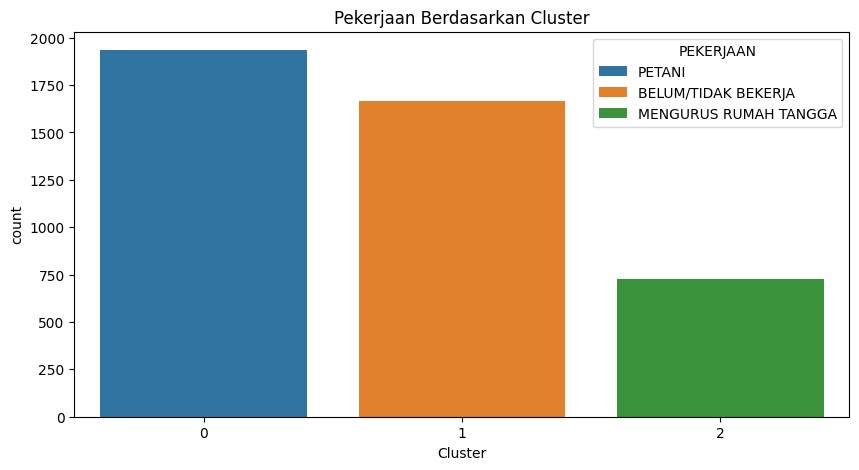

In [ ]:
top_pekerjaan = Data_selection['PEKERJAAN'].value_counts().nlargest(3).index
filtered_data = Data_selection[Data_selection['PEKERJAAN'].isin(top_pekerjaan)]
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', hue='PEKERJAAN', data=filtered_data)
plt.title("Pekerjaan Berdasarkan Cluster")
plt.show()

In [ ]:
#rata rata usia di cluster 0
Data_selection.groupby('Cluster')['ALAMAT'].value_counts()

Cluster  ALAMAT              
0        DUSUN KARANGANYAR       466
         DUSUN CISARUA           434
         DUSUN MEKARSARI         391
         DUSUN CIAKAR            347
         DUSUN CIAWITALI         308
         DUSUN MUNGGANGWARENG    296
1        DUSUN MUNGGANGWARENG    340
         DUSUN KARANGANYAR       315
         DUSUN CIAWITALI         293
         DUSUN CISARUA           284
         DUSUN MEKARSARI         284
         DUSUN CIAKAR            262
2        DUSUN MUNGGANGWARENG    290
         DUSUN CIAWITALI         172
         DUSUN CIAKAR            127
         DUSUN KARANGANYAR       117
         DUSUN CISARUA           111
         DUSUN MEKARSARI         102
Name: count, dtype: int64

### 5.5 Alamat Tiap Cluster

Pekerjaan Tiap Cluster:


*   Cluster 0 Mayoritas Alamat Dusun Karanganyar
*   Cluster 1 Mayoritas Alamat Dusun Munggangwareng
*   Cluster 2 Mayoritas Alamat Dusun Munggangwareng



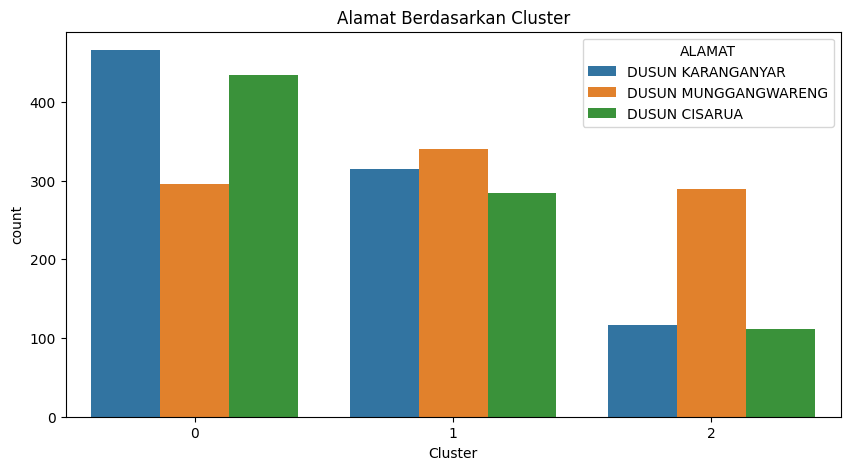

In [ ]:
top_alamat = Data_selection['ALAMAT'].value_counts().nlargest(3).index
filtered_data = Data_selection[Data_selection['ALAMAT'].isin(top_alamat)]
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', hue='ALAMAT', data=filtered_data)
plt.title("Alamat Berdasarkan Cluster")
plt.show()

### 5.6 Pendidikan Tiap Cluster

In [ ]:
#rata rata usia di cluster 0
Data_selection.groupby('Cluster')['PENDIDIKAN'].value_counts()

Cluster  PENDIDIKAN
0        2             1833
         3              147
         0              139
         4               73
         1               33
         7               10
         8                4
         5                3
1        0             1077
         2              341
         1              217
         3               93
         4               35
         7                8
         5                4
         10               2
         8                1
2        2              555
         3              168
         1               87
         4               60
         0               25
         7               16
         5                4
         10               2
         8                1
         9                1
Name: count, dtype: int64

Pendidikan Tiap Cluster:


*   Cluster 0 Mayoritas Pendidikan Tamat SD/Sederajat
*   Cluster 1 Mayoritas Pendidikan Belum/Tidak Sekolah
*   Cluster 2 Mayoritas Pendidikan Tamat SD/Sederajat



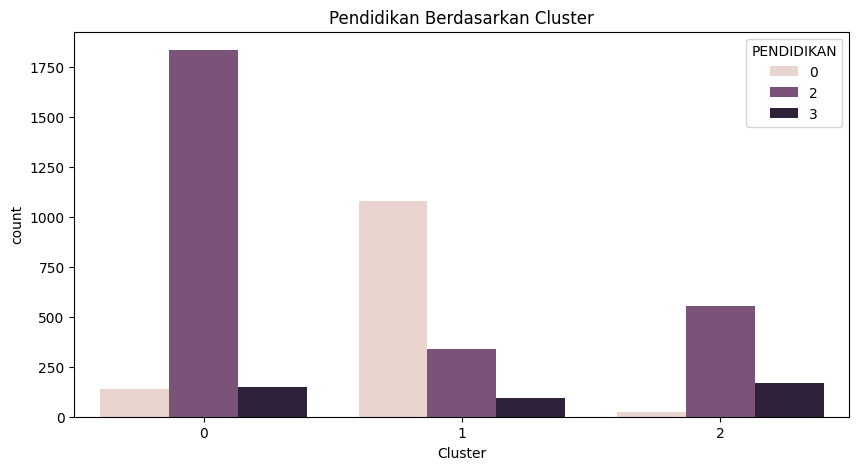

In [ ]:
top_pendidikan = Data_selection['PENDIDIKAN'].value_counts().nlargest(3).index
filtered_data = Data_selection[Data_selection['PENDIDIKAN'].isin(top_pendidikan)]
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', hue='PENDIDIKAN', data=filtered_data)
plt.title("Pendidikan Berdasarkan Cluster")
plt.show()

### 5.7 Status_Hubungan_Keluarga Tiap Cluster

In [ ]:
#rata rata usia di cluster 0
Data_selection.groupby('Cluster')['STATUS_HUBUNGAN_KELUARGA'].value_counts()

Cluster  STATUS_HUBUNGAN_KELUARGA
0        Kepala Keluarga             1482
         Istri                        720
         Anak                          28
         Lainnya                       12
1        Anak                        1474
         Kepala Keluarga              185
         Lainnya                       75
         Istri                         44
2        Istri                        644
         Kepala Keluarga              154
         Anak                         105
         Lainnya                       16
Name: count, dtype: int64

Status_Hubungan_Keluarga Tiap Cluster:


*   Cluster 0 Mayoritas Status_Hubungan_Keluarga Kepala Keluarga
*   Cluster 1 Mayoritas Status_Hubungan_Keluarga Anak
*   Cluster 2 Mayoritas Status_Hubungan_Keluarga Istri



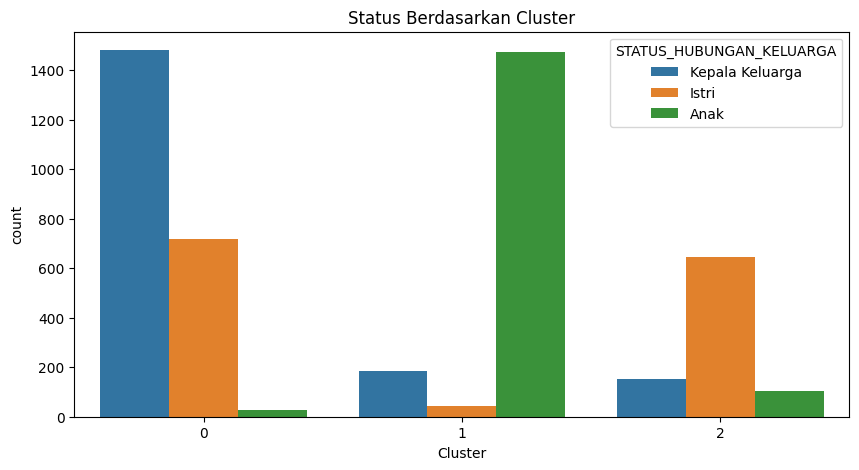

In [ ]:
top_status = Data_selection['STATUS_HUBUNGAN_KELUARGA'].value_counts().nlargest(3).index
filtered_data = Data_selection[Data_selection['STATUS_HUBUNGAN_KELUARGA'].isin(top_status)]
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', hue='STATUS_HUBUNGAN_KELUARGA', data=filtered_data)
plt.title("Status Berdasarkan Cluster")
plt.show()

### 5.8 Status Tiap Cluster

In [ ]:

Data_selection.groupby('Cluster')['STATUS'].value_counts()

Cluster  STATUS     
0        Kawin          2095
         Cerai Mati       93
         Belum Kawin      27
         Cerai Hidup      27
1        Belum Kawin    1560
         Kawin           189
         Cerai Mati       21
         Cerai Hidup       8
2        Kawin           755
         Belum Kawin     119
         Cerai Mati       30
         Cerai Hidup      15
Name: count, dtype: int64

Status Tiap Cluster:


*   Cluster 0 Mayoritas Status Kawin
*   Cluster 1 Mayoritas Status Belum Kawin
*   Cluster 2 Mayoritas Status Kawin



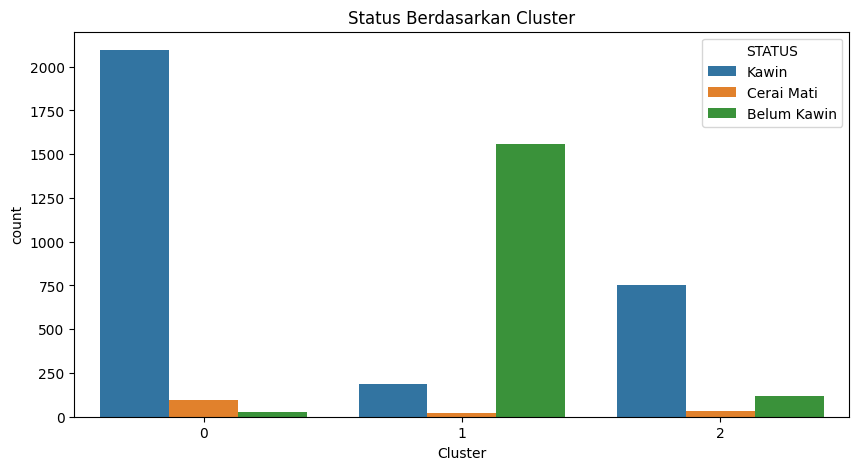

In [ ]:
top_status = Data_selection['STATUS'].value_counts().nlargest(3).index
filtered_data = Data_selection[Data_selection['STATUS'].isin(top_status)]
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', hue='STATUS', data=filtered_data)
plt.title("Status Berdasarkan Cluster")
plt.show()

### 5.9 Kategori Usia Tiap Cluster

In [ ]:
#rata rata usia di cluster 0
Data_selection.groupby('Cluster')['Kategori_Usia'].value_counts()

Cluster  Kategori_Usia  
0        Lanjut Usia        1426
         Dewasa              812
         Tidak Diketahui       4
1        Remaja              698
         Dewasa              577
         Anak-anak           422
         Lanjut Usia          81
2        Dewasa              620
         Lanjut Usia         271
         Remaja               28
Name: count, dtype: int64

Kategori_Usia Tiap Cluster:


*   Cluster 0 Mayoritas Kategori_Usia Lanjut_Usia
*   Cluster 1 Mayoritas Kategori_Usia Remaja
*   Cluster 2 Mayoritas Kategori_Usia Dewasa



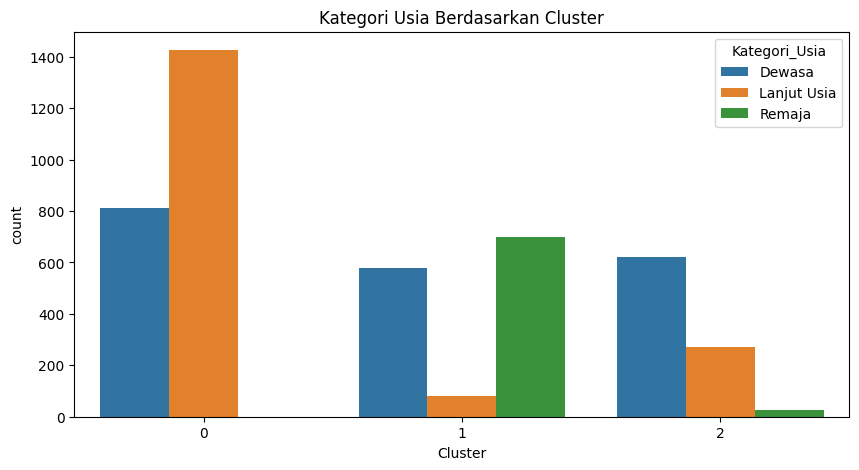

In [ ]:
top_kategori_usia = Data_selection['Kategori_Usia'].value_counts().nlargest(3).index
filtered_data = Data_selection[Data_selection['Kategori_Usia'].isin(top_kategori_usia)]
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', hue='Kategori_Usia', data=filtered_data)
plt.title("Kategori Usia Berdasarkan Cluster")
plt.show()

### 5.10 Jenis Kelamin Tiap Cluster

In [ ]:
Data_selection.groupby('Cluster')['JENIS_KELAMIN'].value_counts()

Cluster  JENIS_KELAMIN
0        Laki-laki        1340
         Perempuan         902
1        Laki-laki        1014
         Perempuan         764
2        Perempuan         791
         Laki-laki         128
Name: count, dtype: int64

Jenis_Kelamin Tiap Cluster:


*   Cluster 0 Mayoritas Jenis_Kelamin Laki-laki
*   Cluster 1 Mayoritas Jenis_Kelamin Laki-laki
*   Cluster 2 Mayoritas Jenis_Kelamin Perempuan



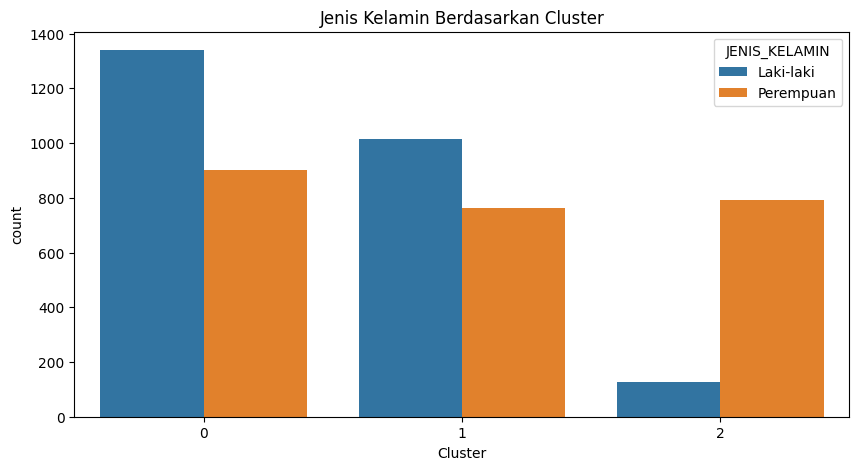

In [ ]:
top_jenis_kelamin = Data_selection['JENIS_KELAMIN'].value_counts().nlargest(3).index
filtered_data = Data_selection[Data_selection['JENIS_KELAMIN'].isin(top_jenis_kelamin)]
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', hue='JENIS_KELAMIN', data=filtered_data)
plt.title("Jenis Kelamin Berdasarkan Cluster")
plt.show()

### 5. 11 Simpulan


*   Pengujian dimulai dengan nilai K=2 hingga K=10. Tes pertama dilakukan pada K=2, yang menghasilkan nilai DBI 0,3104. Tes kedua dilakukan pada K=3 hingga K=10.
*   Hasil analisis menunjukan bahwa cluster dengan nilai DBI yang paling mendekati 0 diperoleh pada K=3 yaitu sebesar 0.3066. Nilai ini menunjukkan bahwa klasterisasi melakukan pekerjaan yang cukup baik untuk menghasilkan cluster dengan kualitas terbaik.
*  Sebagian besar anggota cluster 0 memiliki karakteristik utama, terutama tamat SD dan bekerja sebagai petani. Sebagian besar adalah laki-laki, status sosial sudah menikah, dan bertindak sebagai kepala keluarga. Dengan kelompok ini didominasi oleh kelompok lanjut usia, dengan rata-rata usia 55,35 tahun.
* Sebagian besar anggota cluster 1 memiliki karakteristik utama, yaitu mayoritas belum sekolah dan belum/tidak bekerja. Sebagian besar dari mereka adalah laki-laki dengan status sosial belum kawin dan berfungsi sebagai anak dalam keluarga. Cluster ini terdiri dari kategori usia remaja dan dewasa, dengan rata-rata usia 19,94 tahun.
* Anggota cluster 2 memiliki karakteristik utama, yaitu sebagian besar sedang sekolah SD dan sudah lulus SD. Sebagian besar dari mereka adalah ibu rumah tangga dengan jenis kelamin perempuan dan status sosial kawin. Kebanyakan pada cluster 2 status hubungan keluarga memiliki peran sebagai istri. Kategori usia ini terdiri dari orang dewasa dan orang lanjut usia, dengan rata-rata usia 41,41 tahun.







In [ ]:
Data_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           4939 non-null   int64 
 1   NAMA                         4939 non-null   object
 2   STATUS_HUBUNGAN_KELUARGA     4939 non-null   object
 3   JENIS_KELAMIN                4939 non-null   object
 4   TEMPAT_LAHIR                 4939 non-null   object
 5   STATUS                       4939 non-null   object
 6   AGAMA                        4939 non-null   object
 7   PENDIDIKAN                   4939 non-null   int64 
 8   PEKERJAAN                    4939 non-null   object
 9   DESA                         4939 non-null   object
 10  ALAMAT                       4939 non-null   object
 11  USIA                         4939 non-null   int64 
 12  Kategori_Usia                4939 non-null   object
 13  le_JENIS_KELAMIN             4939

Dataset Terakhirr